## Resumen de la revisión 1 <a class="tocSkip"></a>

-----

# Descripción del proyecto

### Contexto

Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

### Descripción de los datos

Datos utilizados en la primera parte del proyecto

/datasets/hypotheses_us.csv Descarga el dataset

* Hypotheses: breves descripciones de las hipótesis
* Reach: alcance del usuario, en una escala del uno a diez
* Impact: impacto en los usuarios, en una escala del uno al diez
* Confidence: confianza en la hipótesis, en una escala del uno al diez
* Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

Datos utilizados en la segunda parte del proyecto

 /datasets/orders_us.csv Descarga el dataset

* transactionId: identificador de pedido
* visitorId: identificador del usuario que realizó el pedido
* date: fecha del pedido
* revenue: ingresos del pedido
* group: el grupo del test A/B al que pertenece el usuario

/datasets/visits_us.csv Descarga el dataset

* date: la fecha
* group: grupo del test A/B
* visits: el número de visitas en la fecha especificada para el grupo de test A/B especificado

Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

### Parte 1. Priorizar hipótesis
El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.

El ejercicio consiste en:

* Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
* Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
* Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

### Parte 2. Análisis de test A/B

Realizaste un test A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visitors_us.csv.

Ejercicio

Analiza el test A/B:

1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

6. Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

## Librerias 

In [2]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

##  Procesamiento de Datos 

In [3]:
hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypotheses_us.csv',sep=';'),  
    pd.read_csv('/datasets/orders_us.csv'),  
    pd.read_csv('/datasets/visitors_us.csv'),  
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [4]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [8]:
visitors.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Se cambian a minúsculas los nombres de las columnas del DataFrame 'hypothesis'

In [10]:
column_names = [name.lower() for name in hypothesis.columns]
hypothesis.columns = column_names

In [11]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


se modifica el nombre las columnas 'transactionId' y 'visitorId' del DataFrame orders_us

In [12]:
orders = orders.rename(columns= {'transactionId':'transaction_id', 'visitorId': 'visitor_id'})

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


## Parte 1. Priorizar hipótesis

Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
Impacto, confianza, esfuerzo (ICE) es una de las formas más populares de priorizar
problemas: `ICE score = (Impact x Confidence) / Effort`

In [14]:
hypothesis

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [15]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['effort']
hypothesis[['hypothesis', 'ICE']].sort_values(by= 'ICE', ascending= False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
También existe una forma modificada, RICE: `RICE score = (Reach x Impact x Confidence) / Effort`.
    



In [16]:
print('Tres hipótesis más prometedoras con ICE:')
top_hypotheses = hypothesis.sort_values(by='ICE', ascending=False).head(3)
for index, row in top_hypotheses.iterrows():
    print(row['hypothesis'])

Tres hipótesis más prometedoras con ICE:
Launch a promotion that gives users discounts on their birthdays
Add two new channels for attracting traffic. This will bring 30% more users
Add a subscription form to all the main pages. This will help you compile a mailing list


Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [17]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['effort']
hypothesis[['hypothesis', 'RICE']].sort_values(by= 'RICE', ascending= False)

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [18]:
print('Tres hipótesis más prometedoras con RICE:')
top_hypotheses = hypothesis.sort_values(by='RICE', ascending=False).head(3)
for index, row in top_hypotheses.iterrows():
    print(row['hypothesis'])

Tres hipótesis más prometedoras con RICE:
Add a subscription form to all the main pages. This will help you compile a mailing list
Add product recommendation blocks to the store's site. This will increase conversion and average purchase size
Add two new channels for attracting traffic. This will bring 30% more users


En el caso del framework ICE, las hipótesis más prometedoras son las que tienen los índices 8, 0 y 7. Esto sugiere que estas hipótesis tienen altos niveles de impacto y confianza, pero su alcance es bajo, lo que significa que afectan a pocos usuarios o usuarias.

Por otro lado, en el framework RICE, las hipótesis más prometedoras son las que tienen los índices 7, 2 y 0. Aquí, la hipótesis 7 ocupa el primer lugar debido a su mayor puntaje de alcance en comparación con las hipótesis 8 y 0.

Esta comparación resalta una diferencia clave entre ICE y RICE: mientras que ICE se centra en impacto y confianza, RICE también considera el alcance de las hipótesis, es decir, cuántos usuarios o usuarias se ven afectados por ellas. Esta diferencia puede influir en la priorización y selección de hipótesis en proyectos o iniciativas

## Parte 2. Análisis de test A/B

### Representa gráficamente el ingreso acumulado por grupo

Verificar si existen usuarios que estén tanto en el grupo A como en el grupo B 

In [19]:
group_A_data = orders[orders['group'] == 'A']
group_B_data = orders[orders['group'] == 'B']

common_visitors = pd.merge(group_A_data, group_B_data, on='visitor_id', how='inner')['visitor_id'].unique()

if len(common_visitors) == 0:
    print("No hay usuarios que estén en ambos grupos A y B.")
else:
    print(f"{len(common_visitors)} usuarios encontrados en ambos grupos:")
    print(common_visitors)


58 usuarios encontrados en ambos grupos:
[4069496402  199603092 3803269165 2378935119  237748145 4256040402
 2038680547 1738359350 2458001652 3891541246 2716752286 3656415546
 2686716486 2954449915 2927087541 3234906277  457167155 2579882178
 3957174400 1648269707 2780786433  818047933 2044997962 1959144690
 3202540741 1333886533  351125977 3951559397  393266494 3984495233
 4120364173 4266935830 1230306981 1294878855 1614305549    8300375
  477780734 1668030113 3717692402 3766097110 3941795274  471551937
 1316129916 1801183820 1602967004 2587333274 2600415354  232979603
 3972127743 1404934699  276558944 3062433592 2654030115 3963646447
 4186807279 2712142231 2949041841  963407295]


In [20]:
orders = orders[~orders['visitor_id'].isin(list(common_visitors))]

Se obtien la fecha,  grupo, el número de pedidos distintos para el grupo de prueba hasta la fecha especificada incluida,
el número de usuarios distintos en el grupo de prueba que realizan al menos un pedido hasta la fecha especificada incluida,
ingresos totales de pedidos en el grupo de prueba hasta la fecha especificada incluida

In [21]:
Groups = orders[['date', 'group']].drop_duplicates()
ordersAgg = Groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAgg.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [22]:
visitors.head()


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


 los datos diarios acumulados agregados sobre el dataframe  visitantes se obtiene ,la fecha el grupo del test, el número de pedidos distintos para el grupo de prueba hasta la fecha especificada incluida

In [23]:
visitorsAgg = Groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAgg.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Se fusionan los dos DataFrames

In [24]:
fusion_data = ordersAgg.merge(visitorsAgg, left_on=['date', 'group'], right_on=['date', 'group'])
fusion_data.columns=['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
fusion_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


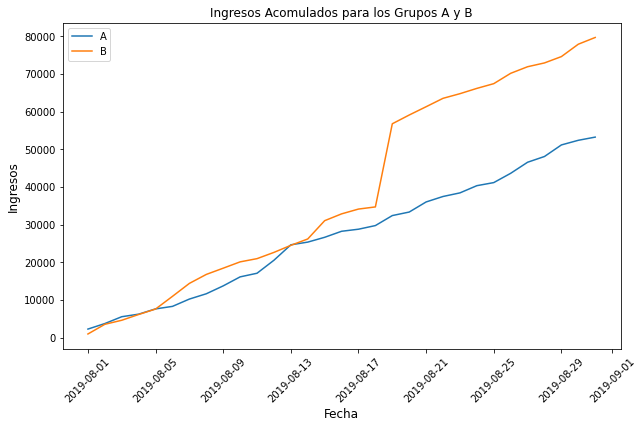

In [25]:
total_revenueA = fusion_data[fusion_data['group']=='A'][['date','revenue', 'orders']]
total_revenueB = fusion_data[fusion_data['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(10, 6))
plt.plot(total_revenueA['date'], total_revenueA['revenue'], label='A')
plt.plot(total_revenueB['date'], total_revenueB['revenue'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('Ingresos Acomulados para los Grupos A y B')
plt.xlabel('Fecha', fontsize= 12)
plt.ylabel('Ingresos', fontsize= 12)
plt.show()

De la grafica podemos sacar diferentes posibilidades:

* Aumento en el número de pedidos: Es posible que el grupo B haya experimentado un aumento significativo en el número de pedidos después de esa fecha. Esto podría deberse a cambios en la estrategia de marketing, la introducción de nuevos productos o servicios, o mejoras en la experiencia del usuario que condujeron a una mayor conversión de visitantes en clientes.
* Pedidos de alto valor: Otro factor a considerar es la posibilidad de que el grupo B haya recibido un aumento en el número de pedidos de alto valor después del 17-08-2019. Esto podría ser el resultado de la promoción de productos más caros, ofertas especiales que atraen a clientes dispuestos a gastar más, o simplemente una coincidencia en el comportamiento de compra de ciertos segmentos de clientes.

### Representa gráficamente el tamaño de pedido promedio acumulado por grupo

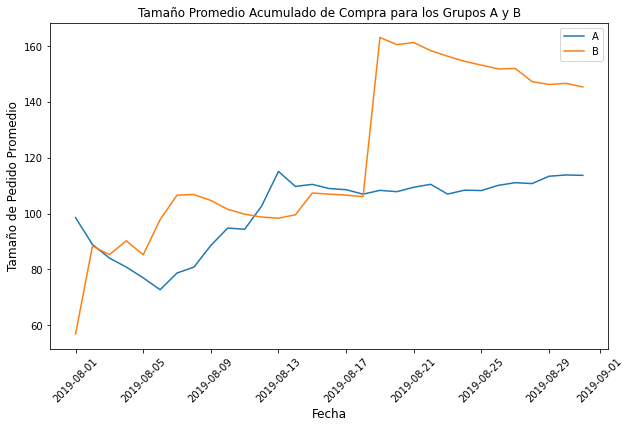

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(total_revenueA['date'], total_revenueA['revenue']/total_revenueA['orders'], label='A')
plt.plot(total_revenueB['date'], total_revenueB['revenue']/total_revenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('Tamaño Promedio Acumulado de Compra para los Grupos A y B')
plt.xlabel('Fecha', fontsize= 12)
plt.ylabel('Tamaño de Pedido Promedio', fontsize= 12)
plt.show()

El aumento significativo en el tamaño promedio de compra del grupo B después del 17-08-2019, seguido de un pico y luego una disminución que se estabiliza al final, junto con un aumento más modesto pero similar en el grupo A, sugiere algunas posibles interpretaciones:

* Campañas promocionales o ofertas especiales: Es posible que después del 17-08-2019, el grupo B haya implementado campañas promocionales o lanzado ofertas especiales que incentivaron a los clientes a realizar compras más grandes en un período de tiempo relativamente corto. Esto explicaría el pico en el tamaño promedio de compra. Sin embargo, una vez que estas ofertas finalizaron, el tamaño promedio de compra podría haber disminuido y estabilizado nuevamente.
* Introducción de nuevos productos o servicios: Otra posibilidad es que el grupo B haya introducido nuevos productos o servicios después del 17-08-2019, que resultaron en compras más grandes por parte de los clientes. Este aumento en el tamaño promedio de compra podría haber sido temporal hasta que los clientes se adaptaron a la nueva oferta y el comportamiento de compra se estabilizó.

### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

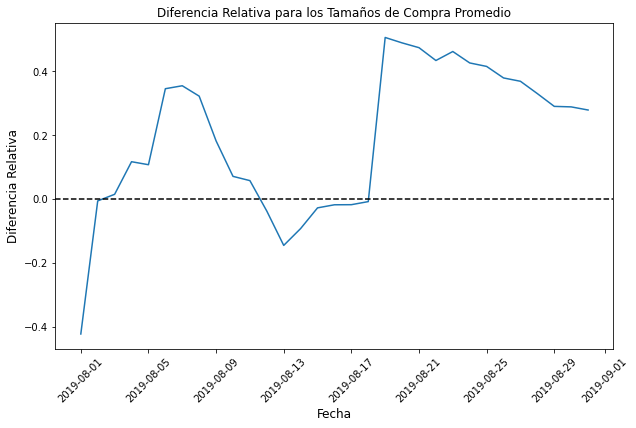

In [27]:
cumulative_revenue = total_revenueA.merge(total_revenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10, 6))
plt.plot(cumulative_revenue['date'], (cumulative_revenue['revenueB']/cumulative_revenue['ordersB'])/(cumulative_revenue['revenueA']/cumulative_revenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('Diferencia Relativa para los Tamaños de Compra Promedio')
plt.xlabel('Fecha', fontsize= 12)
plt.ylabel('Diferencia Relativa', fontsize= 12)
plt.show()

La diferencia entre los secciones aumenta y disminuye mucho,esto se puede deber a compras muy grandes o valores atípicos,sólo hay un valor que es menor que 0, después la diferencia aumenta y se vuelve positiva, una suposición pudiera ser  que el grupo B es porcentualmente más grande en comparación con el grupo A. 

### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia

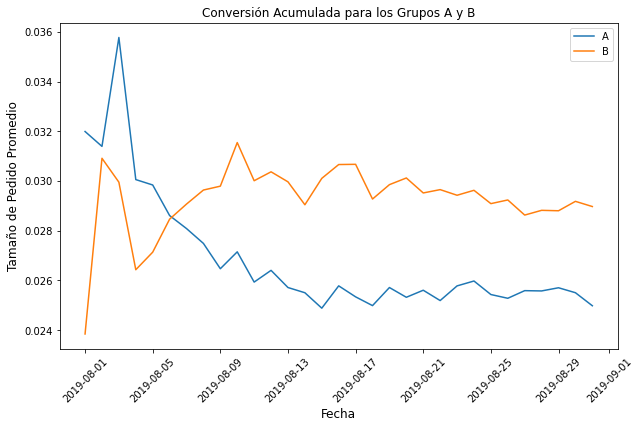

In [28]:
fusion_data['conversion'] = fusion_data['orders']/fusion_data['visitors']
fusion_data_A = fusion_data[fusion_data['group']=='A']
fusion_data_B = fusion_data[fusion_data['group']=='B']
plt.figure(figsize=(10, 6))
plt.plot(fusion_data_A['date'], fusion_data_A['conversion'], label='A')
plt.plot(fusion_data_B['date'], fusion_data_B['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('Conversión Acumulada para los Grupos A y B')
plt.xlabel('Fecha', fontsize= 12)
plt.ylabel('Tamaño de Pedido Promedio', fontsize= 12)
plt.show()

Ambos grupos fluctuaron alrededor del mismo valor, pero luego la tasa de conversión del grupo A cayó antes de estabilizarse, mientras que la tasa de conversión del grupo B aumentó antes de estabilizarse finalmente también.

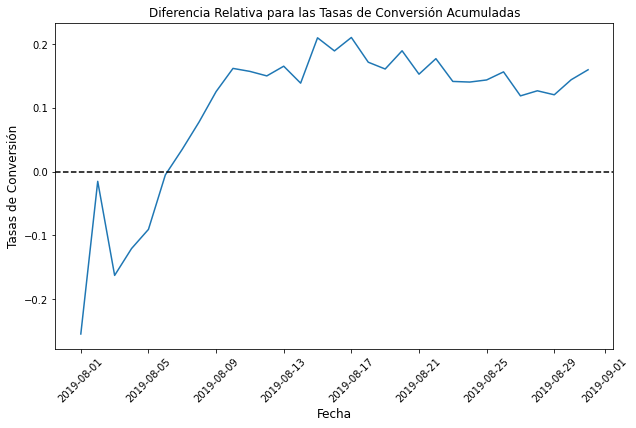

In [29]:
cumulative_conversions = fusion_data_A[['date','conversion']].merge(fusion_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10, 6))
plt.plot(cumulative_conversions['date'], cumulative_conversions['conversionB']/cumulative_conversions['conversionA']-1)
plt.xticks(rotation=45)
plt.title('Diferencia Relativa para las Tasas de Conversión Acumuladas')
plt.xlabel('Fecha', fontsize= 12)
plt.ylabel('Tasas de Conversión', fontsize= 12)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Al inicio de la prueba el grupo B estaba muy por detrás, pero luego inesperadamente consiguió ponerse en cabeza. En general, la tasa de conversión no es estable, por lo que es demasiado pronto para concluir esta prueba. Sin embargo, lo primero que debemos fijarnos es la anomalía; Estas anomalías probablemente cambiarán la imagen. Lo haremos en la siguiente sección.

### Traza un gráfico de dispersión del número de pedidos por usuario.

Los valores atípicos/anomalías que pueden distorsionar los resultados de las pruebas A/B,las anomalías son valores que aparecen muy raramente en poblaciones estadísticas, pero su aparición puede dar lugar a errores.

En el apartado anterior hemos visto cómo el 19 de agosto se produce un pico de ingresos. Esto indica pedidos enormes que resultan en un grupo distorsionado. Sin embargo, este tipo de órdenes son raras; Son excepciones que aparecen al azar, no como resultado de probar nuestras hipótesis. Estos pedidos anormalmente grandes deben eliminarse de las pruebas.


In [30]:
orders_users = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
orders_users.columns = ['user_id', 'orders']
orders_users.sort_values(by='orders', ascending= False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


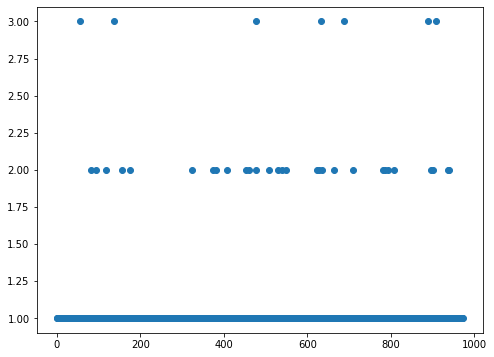

In [31]:
plt.figure(figsize=(8, 6))
x_values = pd.Series(range(0, len(orders_users)))
plt.scatter(x_values, orders_users['orders'])
plt.show()

Podemos ver que la mayoría de los usuarios realizan solo 1 pedido. De hecho, hay muchos usuarios que realizan de dos a cuatro pedidos. Lamentablemente aún se desconoce el número exacto de porcentajes, ya que aún no está claro si debemos considerarlo una anomalía o no.

A continuación, calculemos el percentil del número de pedidos por usuario:

### Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [32]:
print(np.percentile(orders_users['orders'], [95, 99]))

[1. 2.]


El número de usuarios que realizaron más de 1 pedido no superó el 5%. Por lo tanto, podemos establecer un pedido por usuario como el límite inferior del número de pedidos a la vez para filtrar anomalías.

### Traza un gráfico de dispersión de los precios de los pedidos.

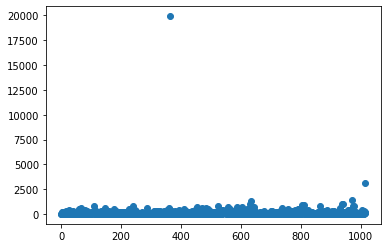

In [33]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

Hay algunos pedidos de gran tamaño. Según el cuadro anterior, podemos establecer un límite para órdenes anormales, que está por encima de $2500. Sin embargo, en general, se filtrarán entre el 1-5\% de los órdenes más extremos del valor observado.

Los percentiles 95 y 99 para el tamaño promedio de los pedidos en nuestra muestra:

### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [34]:
print(np.percentile(orders['revenue'], [95, 99]))

[414.275 830.3  ]


- **Pedidos por encima de \$414**: El porcentaje de pedidos con un costo superior a \$414 no supera el 5%. Esto implica que la mayoría de los pedidos tienen un costo por debajo de este umbral, con solo una pequeña fracción de pedidos más costosos.

- **Pedidos por encima de \$830**: El porcentaje de pedidos con un costo superior a \$830 no supera el 1%. Esto sugiere que los pedidos muy costosos son extremadamente raros y representan solo una pequeña proporción del total de pedidos.


### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

 Se declara las variables sampleA y sampleB, con los usuarios que realizaron pedidos y los números de 
pedidos correspondientes. Los usuarios sin pedidos tendrán un 0 ,lo anterior es necesario para preparar las muestras para la prueba de Mann-Whitney

In [35]:
orders_users_A = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_users_A.columns = ['user_id', 'orders']
orders_users_B = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_users_B.columns = ['user_id', 'orders']

sampleA = pd.concat([orders_users_A['orders'], pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum()  - len(orders_users_A['orders'])), name='orders')], axis=0 )

sampleB = pd.concat([orders_users_B['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(orders_users_B['orders'])), name='orders')],axis=0)



Se calcula la significancia estadística de la diferencia en la conversión basada en los resultados ,después se aplica la prueba de Mann-Whitney.

In [36]:
print(f'Valor p: {stats.mannwhitneyu(sampleA, sampleB)[1] :.5f}')
print(f'Diferencia relativa en la conversión para el grupo B: {sampleB.mean()/sampleA.mean()-1 :.5f}')

Valor p: 0.01102
Diferencia relativa en la conversión para el grupo B: 0.15980


La primera línea del resultado resultante nos da un valor de p de 0,011, que es menor que 0,05. Por tanto, rechazamos la hipótesis nula porque existe una diferencia estadísticamente significativa en la conversión entre grupos. La inclinación relativa del grupo B fue del 16\% .

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

In [37]:
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue']).pvalue
print(f'Valor p: {round(p_value, 5)}')
mean_revenue_group_A = orders[orders['group']=='A']['revenue'].mean()
mean_revenue_group_B = orders[orders['group']=='B']['revenue'].mean()
relative_difference = mean_revenue_group_B / mean_revenue_group_A - 1
print(f"Diferencia relativa en el tamaño promedio para el grupo B: {relative_difference:.3f}")


Valor p: 0.86223
Diferencia relativa en el tamaño promedio para el grupo B: 0.278


El valor p es mucho mayor que 0,05, por lo que no podemos rechazar la hipótesis nula y concluir que el tamaño promedio de los pedidos entre grupos es diferente. Sin embargo, el tamaño promedio de los pedidos del grupo B es de hecho mucho mayor que el del grupo A.

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.

Para identificar usuarios no naturales o anomalías, definimos dos criterios:

1. Un usuario que realiza más de un pedido.
2. Un usuario que realiza un pedido con un valor superior a $414.

Por lo tanto, eliminaremos el 5% de los usuarios con el mayor número de pedidos y entre el 1 y el 5% de los usuarios con el mayor valor de pedido. Esto nos permitirá filtrar las anomalías y trabajar con un conjunto de datos más representativo.

Una vez eliminadas estas anomalías, podremos analizar el comportamiento de los usuarios restantes con mayor precisión y tomar decisiones más fundamentadas en base a estos datos más limpios.

In [38]:
users_many_orders = pd.concat([orders_users_A[orders_users_A['orders'] > 1]['user_id'], orders_users_B[orders_users_B['orders'] > 1]['user_id']], axis = 0)
users_expensive_orders = orders[orders['revenue'] > 415]['visitor_id']
anormal_users = pd.concat([users_many_orders, users_expensive_orders], axis= 0).drop_duplicates().sort_values()

print(anormal_users.head())
print(f'Usuarios anómalos: {anormal_users.shape[0]}')

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
Usuarios anómalos: 86


In [39]:
A_filtered = pd.concat([orders_users_A[np.logical_not(orders_users_A['user_id'].isin(anormal_users))]['orders'], pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(orders_users_A['orders'])),name='orders')],axis=0)
B_filtered = pd.concat([orders_users_B[np.logical_not(orders_users_B['user_id'].isin(anormal_users))]['orders'], pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(orders_users_B['orders'])),name='orders')],axis=0)
p_value_filtered = stats.mannwhitneyu(A_filtered, B_filtered).pvalue
print(f'Valor p: {round(p_value_filtered, 5)}')

print(f'Diferencia relativa en la conversión para el grupo B: {B_filtered.mean()/A_filtered.mean()-1 :.5f}')


Valor p: 0.01593
Diferencia relativa en la conversión para el grupo B: 0.17393


Todavía hay una diferencia significativa entre los grupos A y B.

La primera línea del resultado resultante nos da un valor de p de 0,016, que es menor que 0,05. Por tanto, rechazamos la hipótesis nula porque existe una diferencia estadísticamente significativa en la conversión entre grupos. La inclinación relativa del grupo B aumenta.

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

In [40]:
p_value_filtered_orders = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',
                                    np.logical_not(orders['visitor_id'].isin(anormal_users)))]['revenue'],
                                    orders[np.logical_and(orders['group']=='B',
                                    np.logical_not(orders['visitor_id'].isin(anormal_users)))]['revenue']).pvalue

group_A = orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(anormal_users)))]['revenue'].mean()
group_B = orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(anormal_users)))]['revenue'].mean()

dif_orders_filt = group_B / group_A - 1

print(f'Valor p: {round(p_value_filtered_orders, 5)}')

print(f'Diferencia relativa en el tamaño promedio para el grupo B: {dif_orders_filt :.5f}')

Valor p: 0.77119
Diferencia relativa en el tamaño promedio para el grupo B: -0.03330


El valor p disminuyó y ahora la diferencia entre segmentos es del -3\%, no del 27,8\%. Si bien nuestras conclusiones generales sobre esta prueba no han cambiado, este ejemplo muestra claramente cómo las anomalías pueden afectar los resultados de las pruebas A/B.

### Conclusiones:

1. Los datos sin procesar y los datos filtrados mostraron diferencias estadísticamente significativas en términos de conversiones entre cohortes. Esto sugiere que la adición de bloques de recomendación de productos al sitio de la tienda ha tenido un impacto medible en la conversión de los usuarios.

2. Ni los datos brutos ni los datos filtrados mostraron diferencias estadísticamente significativas en términos del tamaño promedio de los pedidos entre grupos. Sin embargo, la presencia de anomalías en los datos puede haber sesgado los resultados. Al filtrar estos valores atípicos, se observó una disminución del 3% en el tamaño promedio de los pedidos en el grupo B en comparación con el grupo A.

3. Los gráficos que muestran las diferencias de conversión y el tamaño promedio de los pedidos entre grupos indican que los resultados del grupo B son mejores que los del grupo A. Específicamente, hubo un incremento del 16% en la conversión en el grupo B.

Dadas estas observaciones, podemos concluir que la prueba A/B ha tenido un resultado parcialmente exitoso. Existe una probabilidad de que el segmento B obtenga mejores resultados que el segmento A con la adición de bloques de recomendación de productos. Por lo tanto, se recomienda continuar la prueba durante un mes más para recopilar más datos y obtener una comprensión más completa del impacto de esta intervención.